# Data Analytics Spring 2023 &mdash; Exercises 7

### Onni Roivas (last modified: Tue Apr 11 at 18:05)

- **Two** problems + round 6 peer review
- Round 6 peer review deadline: **Tue Apr 18 at 14:00**
- Problems deadline: **Tue Apr 25 at 14:00**
- Last Teams session: **Tue Apr 25 at 16:00**
- Theme: SVD / PCA
- **Make a copy of the original notebook** (right click & duplicate) and add your answers (new cells) there
- There may be no autosave
- **ALWAYS quit working by stopping the server [here](https://jupyter.vle.fi/home), then close your browser tabs**
- Please make both your code and your notebook readable
- When you are done, run the handin code cell at the end of this notebook
- The original notebook may change after publication, but the
  changes should be minor
- Keep your originals up to date by running the code cell below:

In [1]:
import os
os.system('/usr/bin/bash /home/varpha/data_analytics/bin/config.sh');


Configuring...
Done.



## Round 6 peer review

**Deadline: Tue Apr 18 at 14:00**. Nothing new here!

In case you handed in your round 06 exercises, your folder **private/exrc_06/peer_review** should contain an anonymous round 06 solutions notebook of another student. In addition, some model solutions for round 06 are to be found in the folder **public/model_solutions**.

Write a few paragraphs of text (plain or markdown) into your favourite text editor and submit by running the code cell below. Please address the following issues:
 
- Are the solutions okay? Can you understand / run the code?<br/>
- What do you think about the solutions?
- How many points out of 5 do they deserve as a whole?
- How many points would you give to yourself and why?
- Any feedback or comments to Harri?

Harri will read and grade your reviews as follows:
- nonexistent or nearly so = 0p
- something written = 1-2p
- well written 3p.

When done with writing your review, please run the code cell below. It asks you to copy-paste your review text to a field that will become visible once you run the cell.


In [ ]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import submit_peer_review
submit_peer_review()

You may double check your review submission by running the following in the terminal (copy-paste & press enter):

> **cat /home/varpha/data_analytics/private/AB0410/exrc_06/peer_review/review_by_AB0410.txt**

### Problem 1. Mimic

Apply the method in our round_07_notes.ipynb last example to an earlier regression / classification exercise of your own choice. The earlier exercise should have taken some time in fitting the model. Apply SVD/PCA to reduce the data dimensionality, and fit the model again. Compare the fitting times and the model scores.


In [33]:
### Exercise from round 6 model solutions

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.linalg import svd, inv, pinv, eig, norm, polar
import time

# Read the data into a datagframe
wine = pd.read_csv('https://student.labranet.jamk.fi/~varpha/data_analytics/exrc06p01_wine.csv')
# Drop the rows with missing values
wine = wine.dropna()
# Split the data to features and results
X = wine.iloc[:,1:]
y = wine.iloc[:,0]

# Change the targer to a 1 / 0 feature
y = pd.get_dummies(y).drop('red', axis=1)

# Scale the features with the Standard scaler
scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)

# Split the data into training and test sets with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=0)

# Establish the classifier
classifier = LogisticRegression(random_state=0)

# measure the time taken to fit the classifier
start_time = time.time()
classifier.fit(X_train, y_train)
end_time = time.time()

fit_time = end_time - start_time

# train the classifier
classifier.fit(X_train, y_train)

# Test data predictions
y_pred = classifier.predict(X_test)

# Confusion matrix and other scores
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores
scores = [cm, accuracy, precision, recall, f1]
for i in scores:
    print(i)
    
print(f"\nTime taken to fit the model: {fit_time:.4f} seconds")

[[ 462   12]
 [   5 1460]]
0.9912325941206808
0.9918478260869565
0.9965870307167235
0.9942117807286347

Time taken to fit the model: 0.0107 seconds


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# Split the data to features and results
X = wine.iloc[:,1:]
y = wine.iloc[:,0]

# Change the targer to a 1 / 0 feature
y = pd.get_dummies(y).drop('red', axis=1)

# Scale the features with the Standard scaler
scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)

# Perform SVD on the scaled feature matrix X_normalized
U, s, V_T = svd(X_normalized, full_matrices=False)
V = V_T.T

# Determine the number of principal components to keep based on the percentage of the total variance explained
var_explained = np.cumsum(s**2) / np.sum(s**2)
num_components = np.argmax(var_explained >= 0.95) + 1

# Transform the original feature matrix X_normalized to the reduced feature matrix X_reduced
X_reduced = U[:,:num_components] @ np.diag(s[:num_components])

# Split the reduced data into training and test sets with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

# Establish the classifier
classifier = LogisticRegression(random_state=0)

# Train the classifier on the reduced feature matrix X_reduced and time the fitting
import time
start_time = time.time()

classifier.fit(X_train, y_train)

fit_time = time.time() - start_time

# Test data predictions
y_pred = classifier.predict(X_test)

# Confusion matrix and other scores
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores and fitting time
scores = [cm, accuracy, precision, recall, f1]
for i in scores:
    print(i)

print(f"\nTime taken to fit the model: {fit_time:.4f} seconds")

[[ 456   18]
 [  10 1455]]
0.9855595667870036
0.9877800407331976
0.9931740614334471
0.9904697072838667

Time taken to fit the model: 0.0132 seconds


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




Seems that using svd to redyce the data dimensionality lowers the scores a little. And it takes more time to fit the model.

| Original|
|:-|
| 0.9912325941206808 |
| 0.9918478260869565 |
| 0.9965870307167235 |
| 0.9942117807286347 |

| New |
|:-|
| 0.9855595667870036 |
| 0.9877800407331976 |
| 0.9931740614334471 |
| 0.9904697072838667 |

### Problem 2. Forsyth, prob. 10.8

The UC Irvine Machine Learning data archive hosts a dataset of measurements of abalone at https://archive.ics.uci.edu/ml/datasets/Abalone. Compute the principal components of all variables except Sex (i.e. ignore Sex from the data and compute the svd/pca using the rest of the data -- Harri). Now produce a scatter plot of the measurements projected onto the first two principal components, plotting an “m” for male abalone, an “f” for female abalone and an “i” for infants. What do you see?

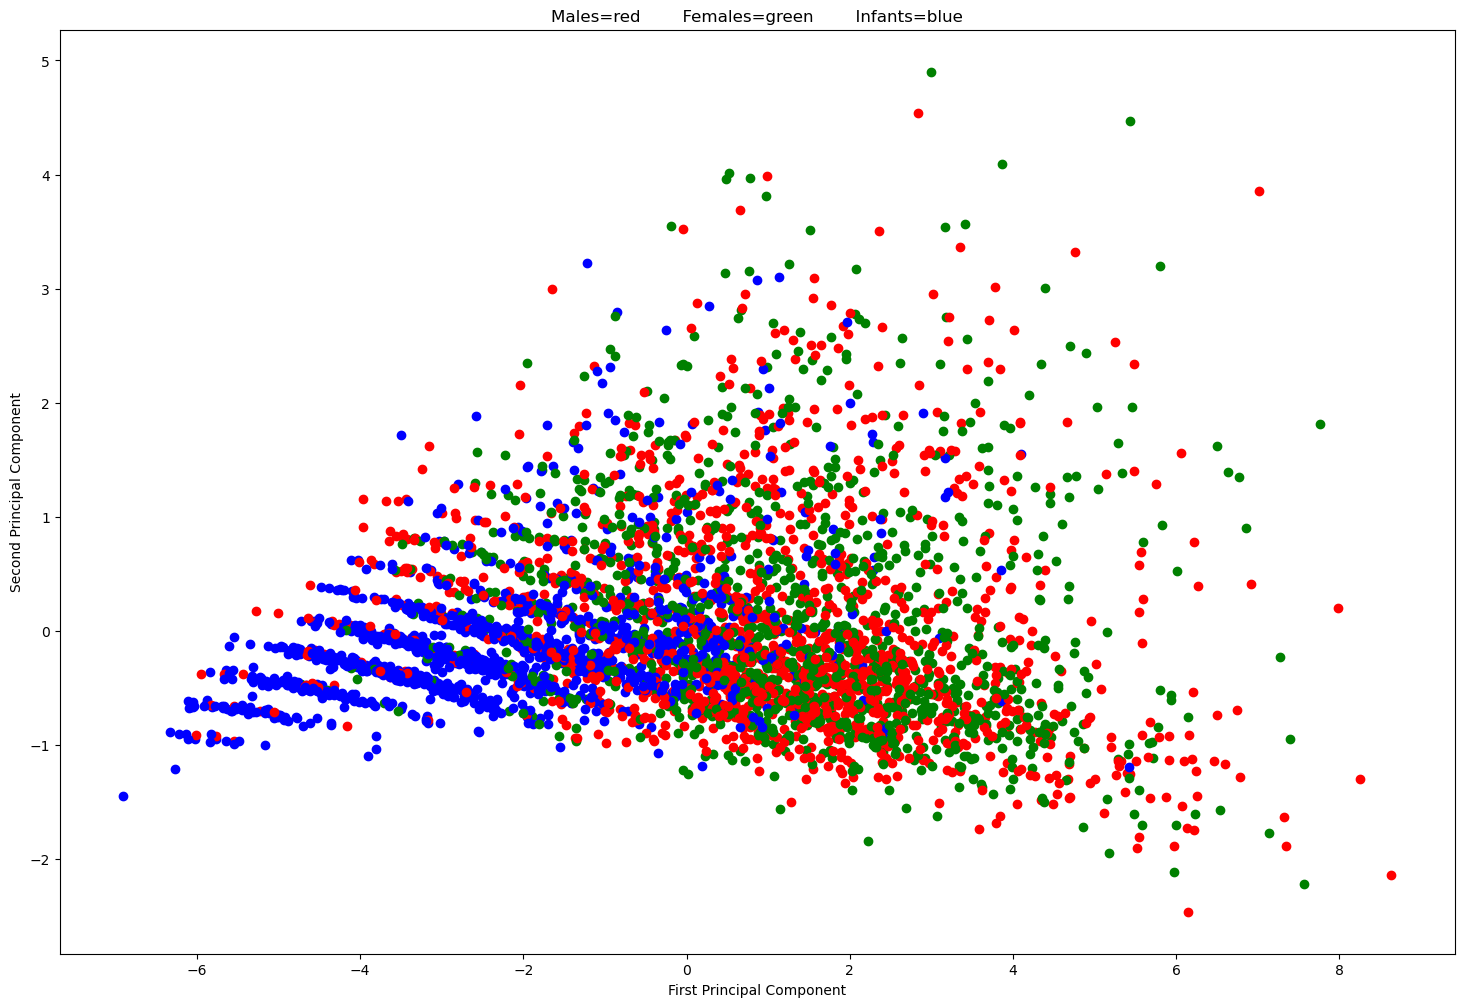

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
columns = ['Sex', 'Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings'] # https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names
data = pd.read_csv(url, names=columns)

# Remove the 'Sex' column
X = data.drop('Sex', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Make the plot bigger
plt.figure(figsize=(18, 12))

# Create a scatter plot of the first two principal components
colors = {'M': 'red', 'F': 'green', 'I': 'blue'}

for i, row in data.iterrows():
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color=colors[row['Sex']])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Males=red        Females=green        Infants=blue')
plt.show()

#### The first principal component
analyses the columns such as sex, length, diameter, height, Whole, Shucked, Viscera, Shell and Rings

#### The second principal component 
analyses the clusters and patterns

## Handin your final answers by running the code cell below.
- Save your latest changes.
- Please remove anything that may identify you to your anonymous reviewer. See [this Teams message](https://teams.microsoft.com/l/message/19:wpZLQbHG775XujahAR4ScrnPZGiByh6yuWgewJCHXVQ1@thread.tacv2/1675678597453?tenantId=6e9eaaf0-3ff7-4de9-8cd4-1ffbd45951b9&groupId=ba0bbd60-8a1b-42b8-84ff-6de6a3c45ab6&parentMessageId=1675678597453&teamName=Data%20Analytics%20YAMK%2C%20Spring%202023&channelName=General&createdTime=1675678597453&allowXTenantAccess=false).
- You may run the code cell as many times as you wish.
- Your permission to write the handin file ends at the deadline.

In [2]:
import sys
sys.path.append('/home/varpha/data_analytics/lib')
from handin import handin_exrc_07
handin_exrc_07()


All the relevant .ipynb files in your current directory:

  1. exrc_07-Copy1.ipynb



Please input the order number (the one in the beginning of the line) of the file you want to hand in:  1



Your answers to the first exercises were handed in successfully. Thank you!
You may double check your handin by calling

    /home/varpha/data_analytics/bin/handin.sh

from the terminal prompt.
